# Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide
de


Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window gla
ss (classes 5-7). 
Predict : Type of glass


Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


In [124]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [213]:
# Loading Dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv',names=['Id','refractive index','Sodium','Magnesium','Aluminum','Solicon','Potassium','Calcium','Barium','Iron','Type of Glass'])
df.head(15)

,Id,refractive index,Sodium,Magnesium,Aluminum,Solicon,Potassium,Calcium,Barium,Iron,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [214]:
# Dimension od Dataset
print(df.shape)
print('Dataset has total {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

(214, 11)
Dataset has total 214 rows and 11 columns.


In [241]:
# Columns In Dataset
print(df.columns.to_list())

['Id', 'refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Solicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of Glass']


"Type of Glass" is our Target Variable. Rest 10 Columns are Independent Variable.

In [215]:
# Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                214 non-null    int64  
 1   refractive index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Solicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type of Glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


1) Dataset has Two dataTypes :- int,float.
2) Target Variable is Integer, So It's a classification Task.

In [216]:
# Checking Value Counts and total number of unique values.
for d in df.columns:
    print(df[d].value_counts())
    print('Total {} unique values present in {} column.'.format(df[d].nunique(),d))
    print('\n')

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64
Total 214 unique values present in Id column.


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: refractive index, Length: 178, dtype: int64
Total 178 unique values present in refractive index column.


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Sodium, Length: 142, dtype: int64
Total 142 unique values present in Sodium column.


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Magnesium, Length: 94, dtype: int64
Total 94 unique values present in Magnesium column.


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Aluminum, Length

1) Id Column is Unique Column, So it Has unique value in all row. we can drop this column.
2) In Magnesium, Potassium, Barium and Iron Column has 0 as Value. we are going to check if it belongs to a particula class or not

In [217]:
# Checking if rows in IRON containing 0 as value belongs to a Praticular Class or not.
df[df['Iron']==0.00].value_counts(df['Type of Glass'])

Type of Glass
1    45
2    44
7    23
3    12
5    11
6     9
dtype: int64

Every Class has 0 as Iron value.

In [218]:
# Checking if rows in MAGNESIUM containing 0 as value belongs to a Praticular Class or not.
df[df['Magnesium']==0.00].value_counts(df['Type of Glass'])

Type of Glass
7    23
2     9
5     7
6     3
dtype: int64

Class 2,5,6 and 7 has 0 as Magnesium value.

In [219]:
# Checking if rows in BARIUM containing 0 as value belongs to a Praticular Class or not.
df[df['Barium']==0.00].value_counts(df['Type of Glass'])

Type of Glass
2    70
1    67
3    16
5    11
6     9
7     3
dtype: int64

All Class has 0 as Barium Value.

In [220]:
# Checking if rows in POTASSIUM containing 0 as value belongs to a Praticular Class or not.
df[df['Potassium']==0.00].value_counts(df['Type of Glass'])

Type of Glass
7    16
6     9
2     3
1     1
3     1
dtype: int64

Class 1,2,3,6 and 7 has 0 as Potassium Value.

# Null Values.

In [352]:
# Checking Null Values
df.isnull().sum()

refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Solicon             0
Potassium           0
Barium              0
Iron                0
Type of Glass       0
dtype: int64

It is Showing 0 null values in dataset, but Some Column has 0 as value and because it does not belong to any particular class. Considering it as Missing Value.

In [222]:
# Replacing 0.00 to np.nan
df['Barium'].replace(0,np.nan,inplace=True)
df['Iron'].replace(0,np.nan,inplace=True)
df['Magnesium'].replace(0,np.nan,inplace=True)
df['Potassium'].replace(0,np.nan,inplace=True)

In [223]:
df.isnull().sum()

Id                    0
refractive index      0
Sodium                0
Magnesium            42
Aluminum              0
Solicon               0
Potassium            30
Calcium               0
Barium              176
Iron                144
Type of Glass         0
dtype: int64

In [224]:
# Filling null value with median of the column.
df['Barium'].fillna(round(df.groupby('Type of Glass')['Barium'].transform('median'),2),inplace=True)
df['Magnesium'].fillna(round(df.groupby('Type of Glass')['Magnesium'].transform('median'),2),inplace=True)
df['Iron'].fillna(round(df.groupby('Type of Glass')['Iron'].transform('median'),2),inplace=True)
df['Potassium'].fillna(round(df.groupby('Type of Glass')['Potassium'].transform('median'),2),inplace=True)

In [225]:
df.isnull().sum()

Id                  0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Solicon             0
Potassium           9
Calcium             0
Barium              9
Iron                9
Type of Glass       0
dtype: int64

In [226]:
# Filling reamaining null values with mean of the column.
df['Barium'].fillna(round(df['Barium'].mean(),2),inplace=True)
df['Iron'].fillna(round(df['Iron'].mean(),2),inplace=True)
df['Potassium'].fillna(round(df['Potassium'].mean(),2),inplace=True)

In [227]:
df.isnull().sum()

Id                  0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Solicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of Glass       0
dtype: int64

In [228]:
# Checking Duplicates Values.
df.duplicated().sum()

0

No Duplicate data is present in the Dataset.

# Description of Data

In [145]:
# Description of Data
df.describe()

,Id,refractive index,Sodium,Magnesium,Aluminum,Solicon,Potassium,Calcium,Barium,Iron,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,3.212944,1.444907,72.650935,0.557150,8.956963,0.353084,0.173505,2.780374
std,61.920648,0.003037,0.816604,0.663208,0.499270,0.774546,0.624386,1.423153,0.512539,0.080119,2.103739
min,1.000000,1.511150,10.730000,0.330000,0.290000,69.810000,0.020000,5.430000,0.060000,0.010000,1.000000
25%,54.250000,1.516522,12.907500,2.730000,1.190000,72.280000,0.310000,8.240000,0.110000,0.150000,1.000000
50%,107.500000,1.517680,13.300000,3.500000,1.360000,72.790000,0.560000,8.600000,0.120000,0.170000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.217500,0.180000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


1) Sodium, Aluminum, Potassium, Calcium, Barium and Iron column showing Huge difference between 75% Percentile and Maximun data. Which indiactes the presence of Outliers in these columns.
2) Mean is Greater than median in Barium Column. Which means it's right skewed.
3) Apart from Barium every Column looks Normally Distributed. 

# Data Visualization

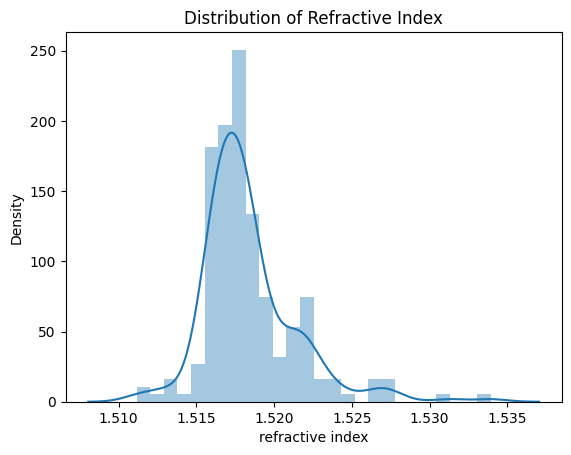

In [229]:
# Distribution of refractive index
sns.distplot(df['refractive index'])
plt.title('Distribution of Refractive Index')
plt.show()

Graph Shows almost normally distribured data in refractive index.

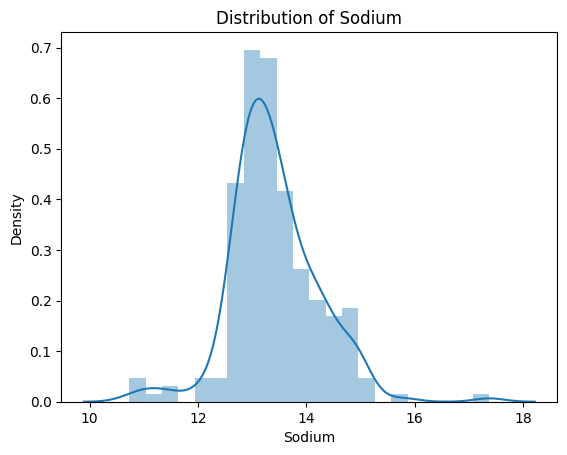

In [230]:
# Distribution of Sodium
sns.distplot(df['Sodium'])
plt.title('Distribution of Sodium')
plt.show()

Data is Distributed Almost normally in Sodium.

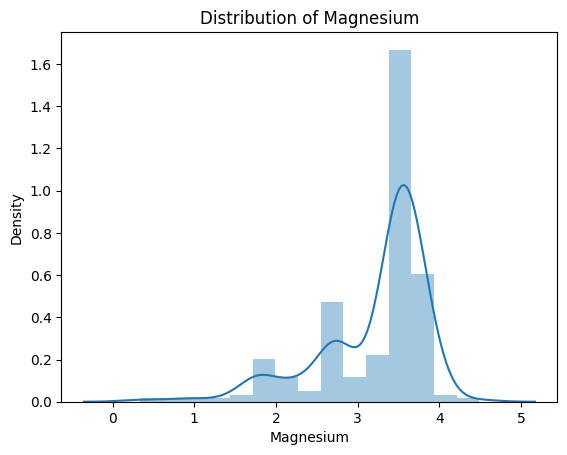

In [231]:
# Distribution of Magnesium.
sns.distplot(df['Magnesium'])
plt.title('Distribution of Magnesium')
plt.show()

Graph is Showing Left skewed data in Magnesium.

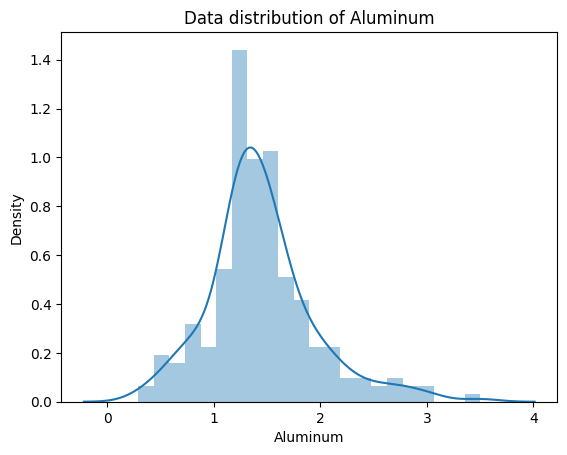

In [232]:
# Distribution of Aluminum
sns.distplot(df['Aluminum'])
plt.title('Data distribution of Aluminum')
plt.show()

Normally distributed data is Aluminum.

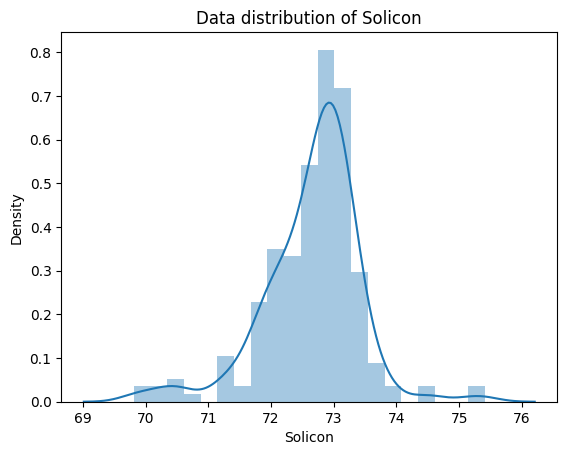

In [233]:
# Distribution of Solicon.
sns.distplot(df['Solicon'])
plt.title('Data distribution of Solicon')
plt.show()

Data Distribution in Solicon looking Normal.

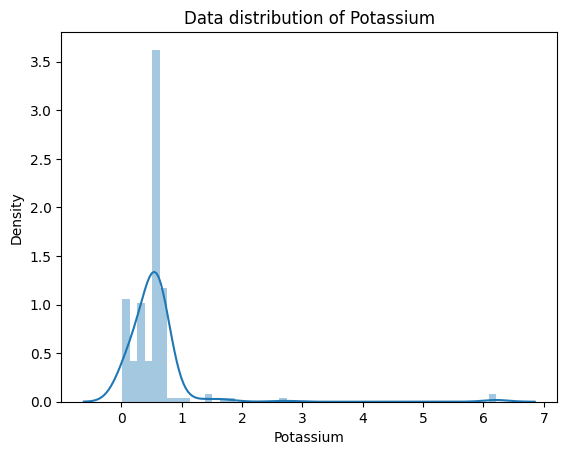

In [234]:
# Distribution of Potassium.
sns.distplot(df['Potassium'])
plt.title('Data distribution of Potassium')
plt.show()

Graph is Showing right skewed data in potassium.

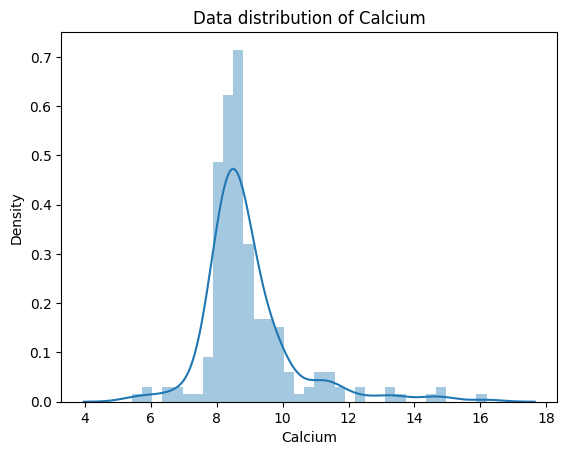

In [235]:
# Distribution of Calcium.
sns.distplot(df['Calcium'])
plt.title('Data distribution of Calcium')
plt.show()

Graph is Showing Normally distributed data in Calcium.

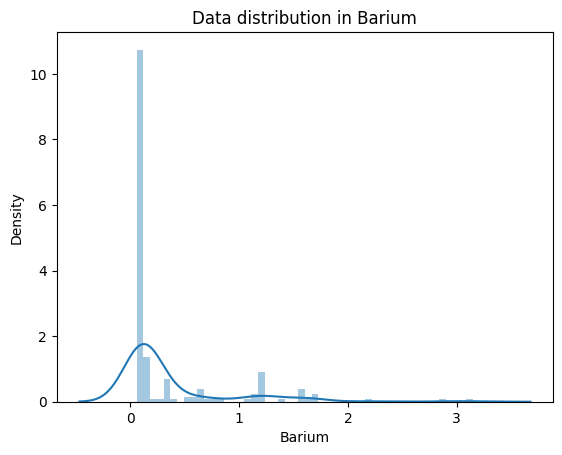

In [236]:
# Distribution of Barium.
sns.distplot(df['Barium'])
plt.title('Data distribution in Barium')
plt.show()

Barium is Right Skewed.

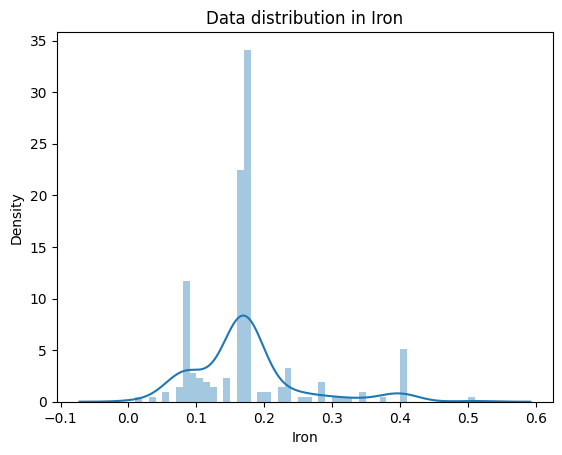

In [237]:
# Distribution of Iron.
sns.distplot(df['Iron'])
plt.title('Data distribution in Iron')
plt.show()

Data is Looking normally distributed in Iron.

Bivariate Analysis.

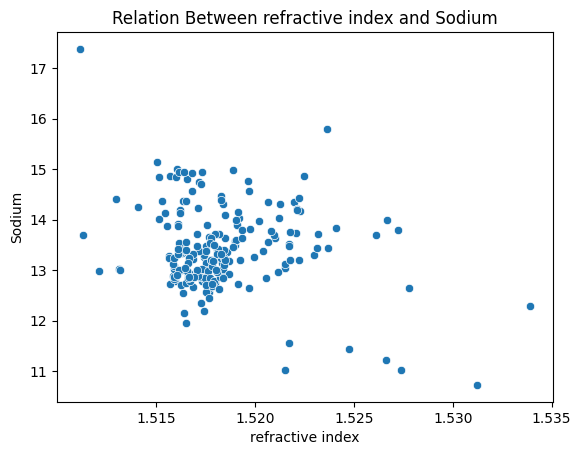

In [240]:
# Relation between refractive index and Sodium.
sns.scatterplot(x='refractive index',y='Sodium',data=df)
plt.title('Relation Between refractive index and Sodium')
plt.show()

Graph is showing no relation between Sodium and refractive index.

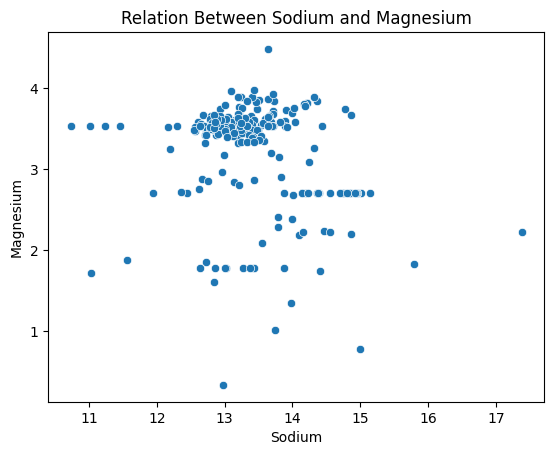

In [242]:
# Relation between Sodium and Magnesium
sns.scatterplot(x='Sodium',y='Magnesium',data=df)
plt.title('Relation Between Sodium and Magnesium')
plt.show()

Graph is showing no relation between Sodium and magnesium.

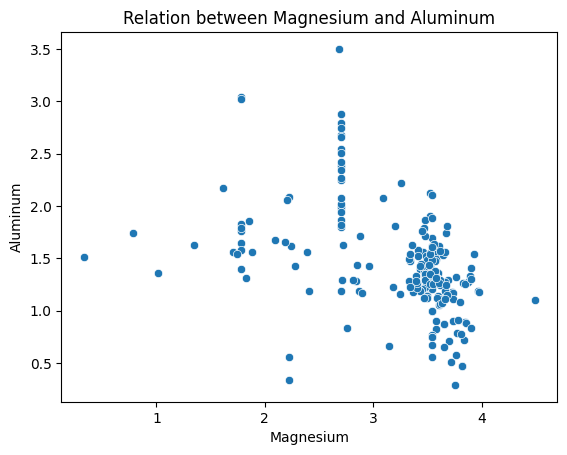

In [243]:
# Checking relation Between Magnesium and Aluminum
sns.scatterplot(x='Magnesium',y='Aluminum',data=df)
plt.title('Relation between Magnesium and Aluminum')
plt.show()

Not very Strong relation between Aluminum and Magnesium.

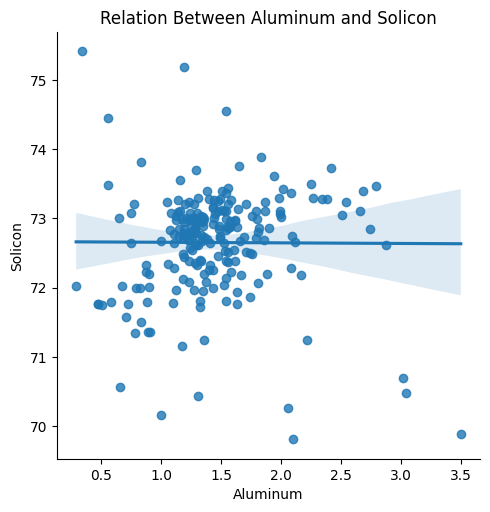

In [248]:
# Checking Relation Between Aluminum and Solicon
sns.lmplot(x='Aluminum',y='Solicon',data=df)
plt.title('Relation Between Aluminum and Solicon')
plt.show()

No linear relation between Solicon and Aluminum.

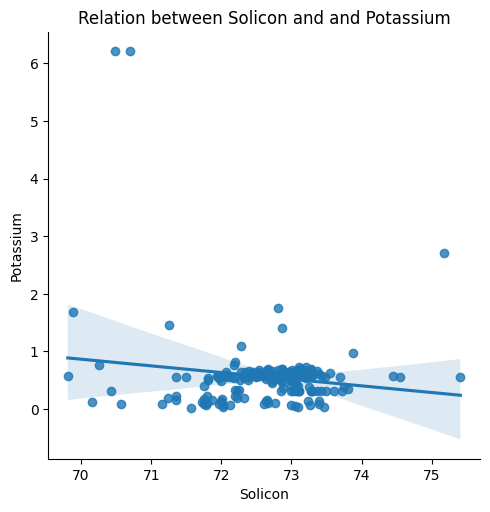

In [249]:
# checking relation between Solicon and Potassium 
sns.lmplot(x='Solicon',y='Potassium',data=df)
plt.title('Relation between Solicon and and Potassium')
plt.show()

Graph is not Showing Any linear relation between Potassium and Solicon.

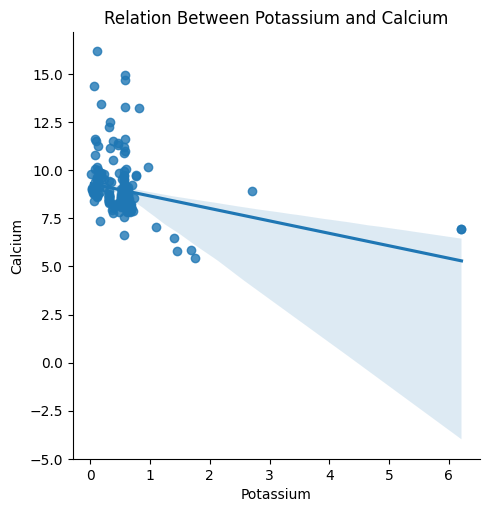

In [250]:
# Checking relation Between Potassium and Calcium.
sns.lmplot(x='Potassium',y='Calcium',data=df)
plt.title('Relation Between Potassium and Calcium')
plt.show()

Weak negative relation between Calcium and Potassium.

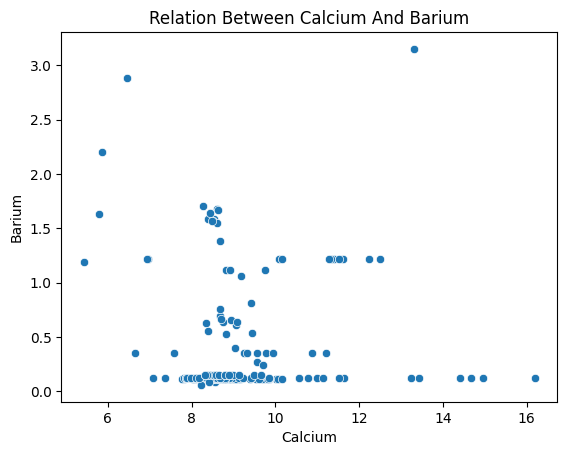

In [252]:
# Checking Relation Between Calcium and Barium
sns.scatterplot(x='Calcium',y='Barium',data=df)
plt.title('Relation Between Calcium And Barium')
plt.show()

No Relation between Barium and Calcium.

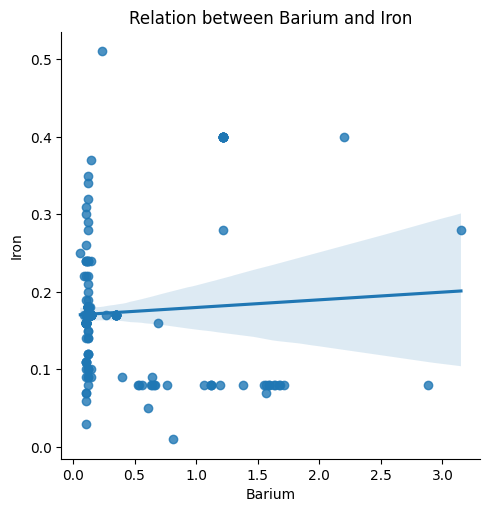

In [253]:
# Checking Relation Between Barium and Iron,
sns.lmplot(x='Barium',y='Iron',data=df)
plt.title('Relation between Barium and Iron')
plt.show()

Graph is not Showing any linear relation between Barium and Iron.

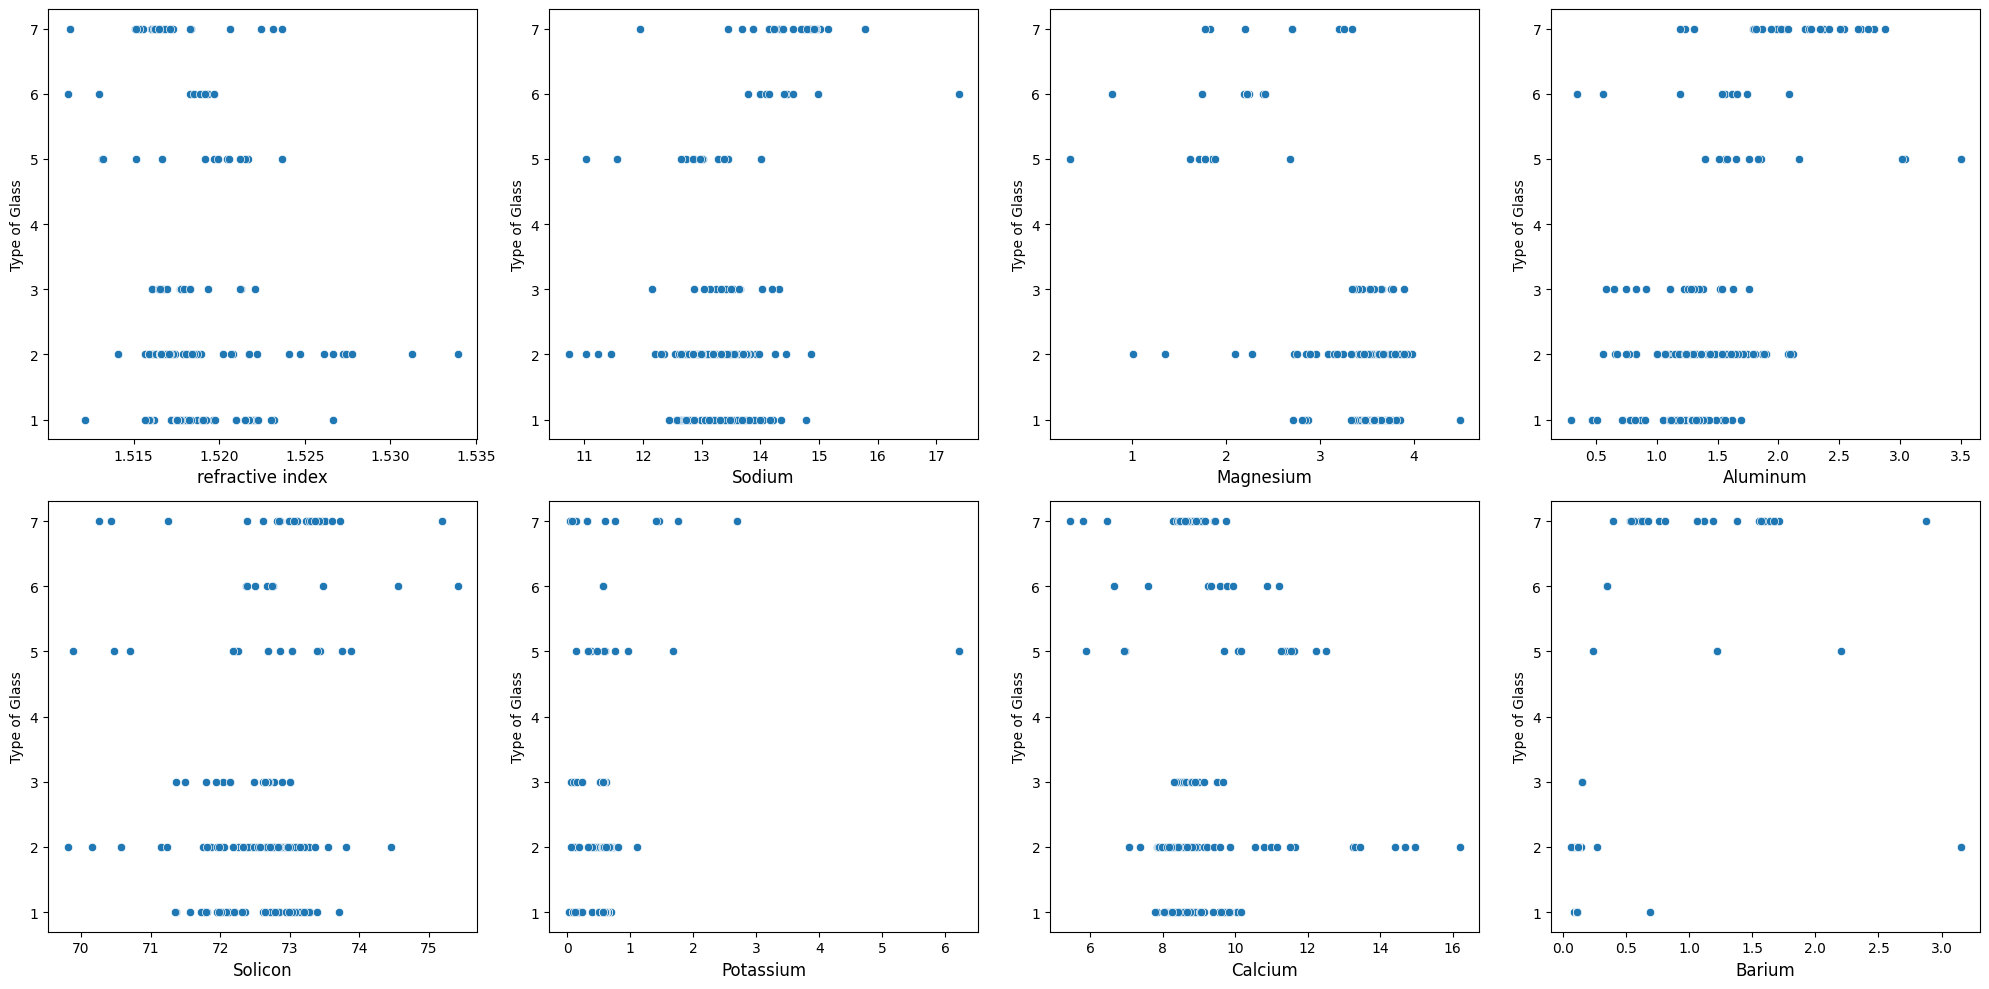

In [267]:
# Checking Relation Between Independent Variables and Target Variable.
plt.figure(figsize=(20,10))
plot=1
for d in df.iloc[:,1:-1].columns:
    if plot <=8:
        s=plt.subplot(2,4,plot)
        sns.scatterplot(x=df[d],y='Type of Glass',data=df)
        plt.xlabel(d,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot+=1
plt.tight_layout()

None of the independent variable is showing relation with Target Variable.

# Correlation

In [268]:
# Correlation
df.corr()

,Id,refractive index,Sodium,Magnesium,Aluminum,Solicon,Potassium,Calcium,Barium,Iron,Type of Glass
Id,1.000000,-0.072209,0.375722,-0.571304,0.490113,0.061232,0.106863,0.090800,0.576303,-0.003781,0.877357
refractive index,-0.072209,1.000000,-0.191885,0.043715,-0.407326,-0.542052,-0.300145,0.810403,0.052379,0.102705,-0.164237
Sodium,0.375722,-0.191885,1.000000,-0.234606,0.156794,-0.069809,-0.177114,-0.275442,0.218506,-0.412688,0.502898
Magnesium,-0.571304,0.043715,-0.234606,1.000000,-0.445796,-0.120075,-0.195053,-0.215657,-0.517188,-0.247794,-0.656979
Aluminum,0.490113,-0.407326,0.156794,-0.445796,1.000000,-0.005524,0.354196,-0.259592,0.517215,0.013547,0.598829
Solicon,0.061232,-0.542052,-0.069809,-0.120075,-0.005524,1.000000,-0.143541,-0.208732,-0.098399,-0.153049,0.151565
Potassium,0.106863,-0.300145,-0.177114,-0.195053,0.354196,-0.143541,1.000000,-0.284432,0.220595,0.306561,0.114324
Calcium,0.090800,0.810403,-0.275442,-0.215657,-0.259592,-0.208732,-0.284432,1.000000,0.035007,0.218435,0.000952
Barium,0.576303,0.052379,0.218506,-0.517188,0.517215,-0.098399,0.220595,0.035007,1.000000,0.063382,0.710180
Iron,-0.003781,0.102705,-0.412688,-0.247794,0.013547,-0.153049,0.306561,0.218435,0.063382,1.000000,-0.120199


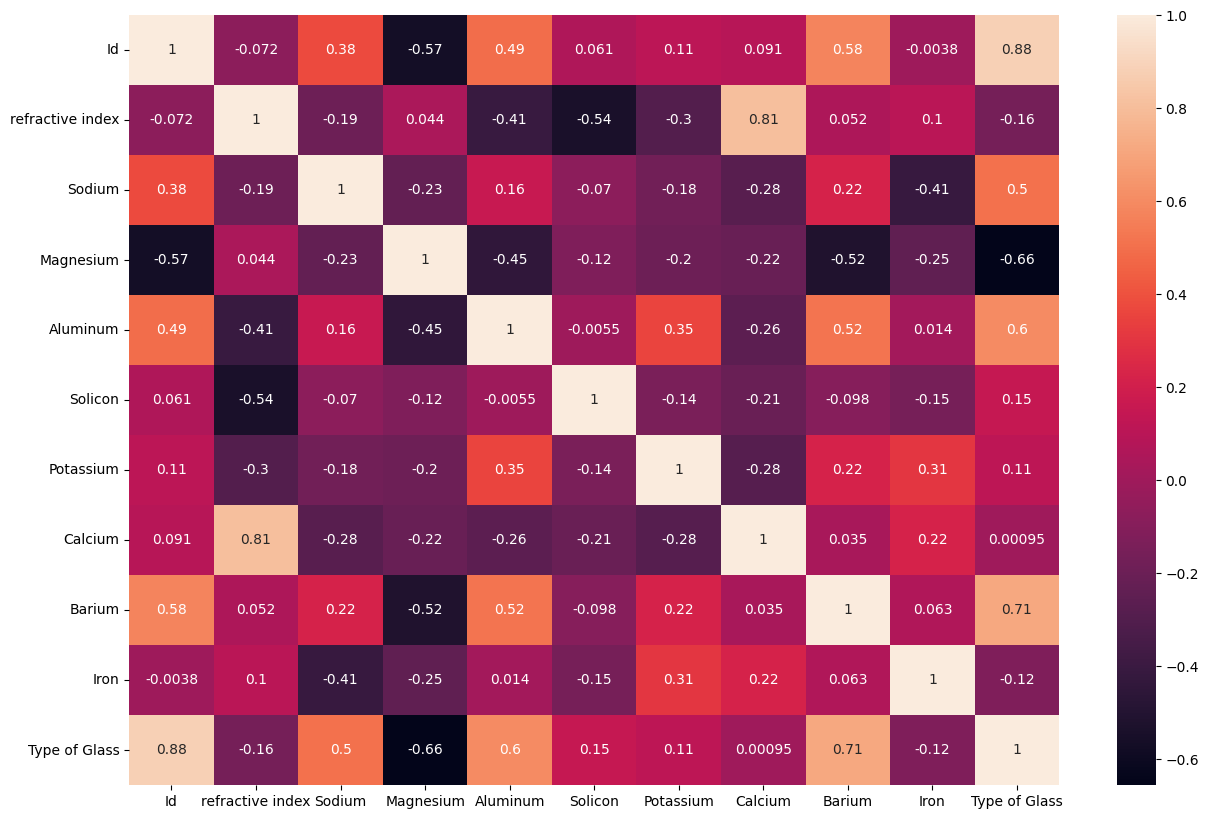

In [269]:
# Using HeatMap To visualize correlation.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

1) Barium has highest Possitive correlation with Target Variable.
2) Magnesium has highest Negative correlation with Target variable.
3) Calcium has almost no correlation with target variable. hence, Going to drop it.

In [270]:
# Dropping Id and Calcium Column.
df.drop(['Id','Calcium'],axis=1,inplace=True)

In [271]:
df.shape

(214, 9)

# Outliers

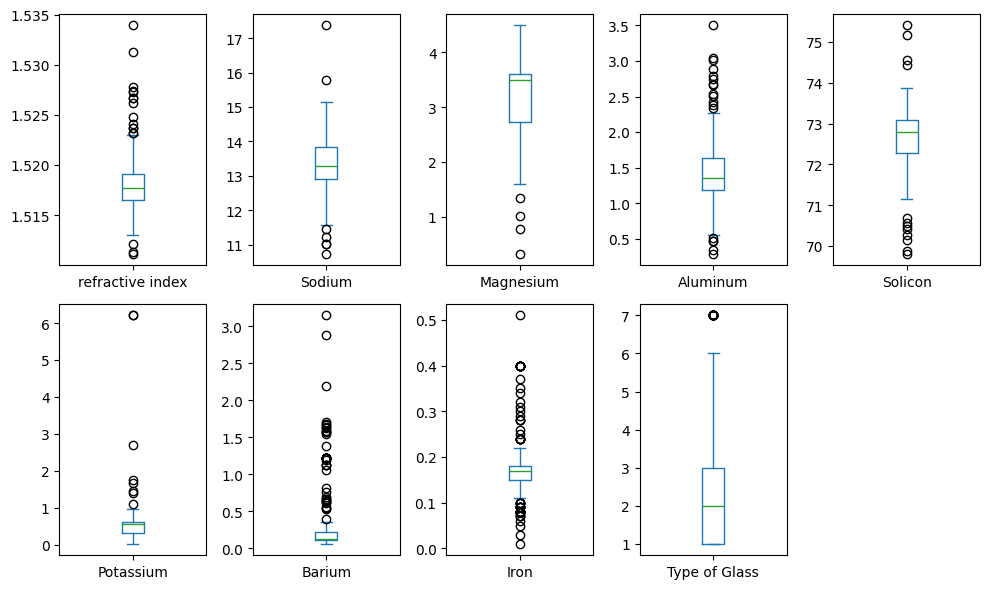

In [272]:
# Using Boxplot to check outliers.
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,6))
plt.tight_layout()
plt.show()

1) outliers are present in every Independent variable.
2) Maximum outliers are present in Barium and Iron.

In [273]:
# importing zscore
from scipy.stats import zscore

In [274]:
z=np.abs(zscore(df.iloc[:,0:-1]))
z

,refractive index,Sodium,Magnesium,Aluminum,Solicon,Potassium,Barium,Iron
0,0.872868,0.284953,1.930090,0.692442,1.127082,0.798088,0.475386,0.168952
1,0.249333,0.591817,0.584981,0.170460,0.102319,0.123850,0.475386,0.168952
2,0.721318,0.149933,0.509413,0.190912,0.438787,0.268330,0.475386,0.168952
3,0.232831,0.242853,0.721003,0.310994,0.052974,0.020629,0.475386,0.168952
4,0.312045,0.169205,0.615208,0.411375,0.555256,0.011477,0.475386,0.168952
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,0.775242,2.881125,0.052974,0.765982,1.382476,1.169803
210,0.500178,1.856097,0.775242,1.094342,0.529374,0.396756,2.418968,1.169803
211,0.754046,1.168721,0.775242,1.154570,0.995252,0.396756,2.516750,1.169803
212,0.612399,1.193270,0.775242,0.993960,1.241133,0.396756,2.379855,1.169803


In [275]:
# Threshold =3
print(np.where(z>3))

(array([106, 106, 106, 106, 107, 107, 112, 130, 163, 163, 163, 171, 171,
       172, 172, 174, 175, 181, 184, 184, 188, 201, 201, 207], dtype=int64), array([0, 1, 4, 6, 0, 4, 0, 2, 3, 4, 6, 3, 5, 3, 5, 7, 2, 2, 1, 4, 4, 4,
       5, 6], dtype=int64))


In [276]:
dfn=df[np.abs(z<3).all(axis=1)]
dfn.shape

(200, 9)

In [277]:
df.shape

(214, 9)

In [278]:
print('Total {} rows removed due to Outliers.'.format(df.shape[0]-dfn.shape[0]))

Total 14 rows removed due to Outliers.


# Dividing Glass Type
1) From Type 1-3 as Windows Glass.
2) From Type 5-7 as Non-windows Glass.

In [279]:
# Checking Value count of Glass Type.
dfn['Type of Glass'].value_counts()

2    72
1    70
7    26
3    17
5     8
6     7
Name: Type of Glass, dtype: int64

In [280]:
# Dividing Glass Type
dfn['Type of Glass'].replace(1,'window Glass',inplace=True)
dfn['Type of Glass'].replace(2,'window Glass',inplace=True)
dfn['Type of Glass'].replace(3,'window Glass',inplace=True)
dfn['Type of Glass'].replace(5,'non-window Glass',inplace=True)
dfn['Type of Glass'].replace(6,'non-window Glass',inplace=True)
dfn['Type of Glass'].replace(7,'non-window Glass',inplace=True)

In [281]:
dfn['Type of Glass'].value_counts()

window Glass        159
non-window Glass     41
Name: Type of Glass, dtype: int64

Here we can see that we have class imbalance Problem. Which we will handle later.

# Encoding

In [282]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [283]:
# Encoding Type of Glass
dfn['Type of Glass']=LabelEncoder().fit_transform(dfn['Type of Glass'])

In [284]:
dfn['Type of Glass'].value_counts()

1    159
0     41
Name: Type of Glass, dtype: int64

Splitting Input and Output Data.

In [285]:
# Splitting Input and Output Data.
x=dfn.drop('Type of Glass',axis=1)
y=dfn['Type of Glass']

In [286]:
# Input Data Shape
x.shape

(200, 8)

In [287]:
# Output Data Shape
y.shape

(200,)

# Skewness

In [288]:
# Checking Skewness In Data
x.skew()

refractive index    1.202666
Sodium              0.096372
Magnesium          -1.395946
Aluminum            0.635779
Solicon            -0.637787
Potassium           0.640883
Barium              2.270635
Iron                1.356345
dtype: float64

Apart from Sodium skewness in present in every column.

In [289]:
# Creating Copy.
xa=x.copy()

In [290]:
x.skew()

refractive index    1.202666
Sodium              0.096372
Magnesium          -1.395946
Aluminum            0.635779
Solicon            -0.637787
Potassium           0.640883
Barium              2.270635
Iron                1.356345
dtype: float64

In [291]:
# Removing Skewness using Cube Root
x['refractive index']=np.cbrt(x['refractive index'])
x['Magnesium']=np.cbrt(x['Magnesium'])
x['Aluminum']=np.cbrt(x['Aluminum'])
x['Solicon']=np.cbrt(x['Solicon'])
x['Potassium']=np.cbrt(x['Potassium'])
x['Iron']=np.cbrt(x['Iron'])
x['Barium']=np.cbrt(x['Barium'])

In [292]:
x.skew()

refractive index    1.198053
Sodium              0.096372
Magnesium          -1.694406
Aluminum           -0.343783
Solicon            -0.662294
Potassium          -1.115252
Barium              1.849076
Iron               -0.102363
dtype: float64

In [293]:
# Removing Remaining Skewness using sqrt.
x['refractive index']=np.sqrt(x['refractive index'])
x['Magnesium']=np.sqrt(x['Magnesium'])
x['Solicon']=np.sqrt(x['Solicon'])
x['Potassium']=np.sqrt(x['Potassium'])
x['Barium']=np.sqrt(x['Barium'])

In [294]:
x.skew()

refractive index    1.196900
Sodium              0.096372
Magnesium          -1.775064
Aluminum           -0.343783
Solicon            -0.668421
Potassium          -1.418895
Barium              1.750376
Iron               -0.102363
dtype: float64

In [295]:
x.isnull().sum()

refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Solicon             0
Potassium           0
Barium              0
Iron                0
dtype: int64

In [296]:
# Using Log Transform.
x['refractive index']=np.log(x['refractive index'])
x['Magnesium']=np.log(x['Magnesium'])
x['Solicon']=np.log(x['Solicon'])
x['Potassium']=np.log(x['Potassium'])
x['Barium']=np.log(x['Barium'])

In [297]:
x.skew()

refractive index    1.195746
Sodium              0.096372
Magnesium          -1.858615
Aluminum           -0.343783
Solicon            -0.674549
Potassium          -1.720323
Barium              1.656197
Iron               -0.102363
dtype: float64

In [298]:
x.isnull().sum()

refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Solicon             0
Potassium           0
Barium              0
Iron                0
dtype: int64

In [299]:
# Importing Power Transformer
from sklearn.preprocessing import PowerTransformer

In [300]:
# Using Power Transformer to remove Skewness.
x=pd.DataFrame(PowerTransformer().fit_transform(x),columns=x.columns)

In [301]:
x.skew()

refractive index    0.000000
Sodium              0.014769
Magnesium          -0.242570
Aluminum            0.047464
Solicon             0.057570
Potassium           0.166581
Barium              0.749135
Iron                0.048086
dtype: float64

In [302]:
x.isnull().sum()

refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Solicon             0
Potassium           0
Barium              0
Iron                0
dtype: int64

# Scaling

In [304]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [306]:
# Scaling Input Data
x1=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)
x1

,refractive index,Sodium,Magnesium,Aluminum,Solicon,Potassium,Barium,Iron
0,1.160979,0.330686,4.134243,-0.677615,-1.447594,-1.987803,-0.687150,0.007296
1,-0.194010,0.667681,0.532071,-0.064616,-0.030111,0.021241,-0.687150,0.007296
2,-0.809913,0.181811,0.389956,0.331514,0.421316,-0.355064,-0.687150,0.007296
3,-0.194010,-0.253397,0.802269,-0.224450,-0.228648,0.387908,-0.687150,0.007296
4,-0.276130,-0.171552,0.590499,-0.340831,0.584616,0.307083,-0.687150,0.007296
...,...,...,...,...,...,...,...,...
195,-0.809913,1.002826,-1.279544,2.843055,-0.228648,-1.856640,1.871992,-1.409747
196,-0.522492,2.037018,-1.279544,1.246881,0.548006,-0.701618,1.909186,-1.409747
197,0.996738,1.296254,-1.279544,1.304774,1.236015,-0.701618,1.911134,-1.409747
198,-0.686733,1.322861,-1.279544,1.149614,1.624980,-0.701618,1.908361,-1.409747


# VIF

In [307]:
# Importing VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [308]:
#Creating Function For Checking VIF values.
def vif(data):
    vif=pd.DataFrame()
    vif['Columns']=data.columns
    vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    print(vif)

In [309]:
# Checking VIFG values.
vif(x1)

            Columns       VIF
0  refractive index  3.100102
1            Sodium  2.678496
2         Magnesium  2.455521
3          Aluminum  2.606961
4           Solicon  2.404568
5         Potassium  1.686597
6            Barium  2.794711
7              Iron  1.500916


Multicolinearity is notpresent in the DataSet. 

# OverSampling

In [310]:
y.value_counts()

1    159
0     41
Name: Type of Glass, dtype: int64

In [311]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [312]:
# Rectifying Class Imbalance Problem.
xn,yn=SMOTE().fit_resample(x1,y)

In [313]:
y.value_counts()

1    159
0     41
Name: Type of Glass, dtype: int64

In [314]:
yn.value_counts()

1    159
0    159
Name: Type of Glass, dtype: int64

handled Class Imbalance problem.

# Modelling

In [315]:
# Importing ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

Random State

In [316]:
# Creating Function to Find best Random State
def Random_state(x,y):
    rs=0
    acc=0
    for i in range(1,201):
       rfc=RandomForestClassifier()
       x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
       rfc.fit(x_train,y_train)
       pred=rfc.predict(x_test)
       acs=accuracy_score(y_test,pred)
       if acs>acc:
           acc+=acs
           rs+=i
    print('Best accuracy {} on random state {}'.format(acc,rs))

In [318]:
# Finding Best random State
Random_state(xn,yn)

Best accuracy 1.0 on random state 1


In [319]:
# Splitting Training and Testing Data
xtrain,xtest,ytrain,ytest=train_test_split(xn,yn,test_size=0.30,random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(222, 8)
(96, 8)
(222,)
(96,)


In [320]:
# Importing ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [321]:
# Importing Classification Metrics
from sklearn.metrics import classification_report, confusion_matrix

In [322]:
# Creating Variables for ML Models
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gb=GaussianNB()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
lr=LogisticRegression()
bgc=BaggingClassifier()

In [323]:
# Creating list with Ml model Variables
models=[dtc,knn,svc,rfc,gb,adc,gdc,etc,lr,bgc]

In [324]:
# Iterating Every Imported Model to Compare and Find Best Performing Model.
for m in models:
    m.fit(xtrain,ytrain)
    print(m)
    print('Accuracy_score',accuracy_score(ytest,m.predict(xtest)))
    print(confusion_matrix(ytest,m.predict(xtest)))
    print(classification_report(ytest,m.predict(xtest)))
    print('CrossValScore')
    score=cross_val_score(m,xn,yn)
    print(score)
    print(score.mean())
    print("difference between accuracy score and cv mean score for {} is".format(m),round(accuracy_score(ytest,m.predict(xtest))*100-score.mean()*100,2))
    print('*'*100)
    print('\n')

DecisionTreeClassifier()
Accuracy_score 1.0
[[50  0]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        46

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

CrossValScore
[1.         0.984375   1.         0.98412698 1.        ]
0.9937003968253968
difference between accuracy score and cv mean score for DecisionTreeClassifier() is 0.63
****************************************************************************************************


KNeighborsClassifier()
Accuracy_score 1.0
[[50  0]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        46

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00      

1) Every Model is performing well on dataset,
2) Considering ExtraTreesClassifier as best Performing Model. Because it's performing best in ensembling Models.

# Hyper Parameter Tuning

In [325]:
# Importing Grid Search CV
from sklearn.model_selection import GridSearchCV

In [326]:
# ExtraTrees Classifier.
ModelETR=ExtraTreesClassifier()

In [327]:
# Creating Parameters Dictionary
params={'n_estimators':[50,100,150],
       'criterion':['gini','entropy','log_loss'],
       'max_features':['sqrt','log2'],
       'random_state':range(1,50)}

In [328]:
# Creating Variable
gscv=GridSearchCV(ModelETR,params,cv=5)

In [329]:
# Searching Best Params
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150],
                         'random_state': range(1, 50)})

In [330]:
# Best Parameter
gscv.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 50,
 'random_state': 5}

In [336]:
# Creating Model with best Parametrs to check How it is Performing.
MODEL_ETC=ExtraTreesClassifier(n_estimators=50,criterion='gini',max_features='sqrt',random_state=5)

In [337]:
MODEL_ETC.fit(xtrain,ytrain)

ExtraTreesClassifier(n_estimators=50, random_state=5)

In [340]:
PredMODEL_ETC=MODEL_ETC.predict(xtest)

In [341]:
print(accuracy_score(ytest,PredMODEL_ETC))

1.0


# AUC ROC CURVE

In [335]:
# Imprting metrics
from sklearn import metrics

Text(0.5, 1.0, 'AUC ROC CURVE')

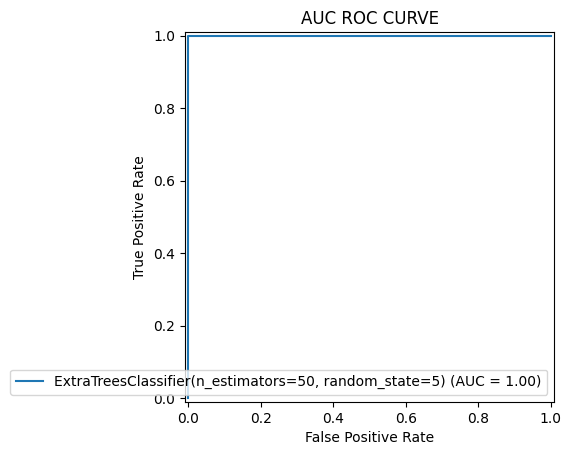

In [342]:
# Plotting Auc ROC Curve
fpr,tpr,thresholds=metrics.roc_curve(ytest,PredMODEL_ETC)
roc_auc=metrics.auc(fpr,tpr)
graph=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=MODEL_ETC)
graph.plot()
plt.title('AUC ROC CURVE')

# Saving Best Model

In [343]:
# Imprting Pickle
import pickle

In [344]:
# Creating Filename
filename='GlassType.pkl'

In [347]:
# Saving best Model
pickle.dump(MODEL_ETC,open(filename,'wb'))

In [348]:
# Loading Saved Model
model_etc=pickle.load(open(filename,'rb'))

In [349]:
pred_model=model_etc.predict(xtest)

In [351]:
# Creating DataFrame
PredDF=pd.DataFrame({'Original':ytest,'Predicted':pred_model})
PredDF

,Original,Predicted
123,1,1
110,1,1
80,1,1
131,1,1
132,1,1
...,...,...
201,0,0
266,0,0
212,0,0
310,0,0
